In [1]:
import pandas as pd

import chart_studio.plotly as py
import plotly.graph_objs as go
import plotly.io as pio
from plotly.offline import iplot, init_notebook_mode
import cufflinks
cufflinks.go_offline(connected=True)
init_notebook_mode(connected=True)
t = go.layout.Template(
    layout=go.Layout(
        hovermode='x'
    )
)
t.data.scatter = [
    go.Scatter(hoverlabel=go.scatter.Hoverlabel(namelength=-1))
]
pio.templates["my"] = t
pio.templates.default = "plotly_dark+my"

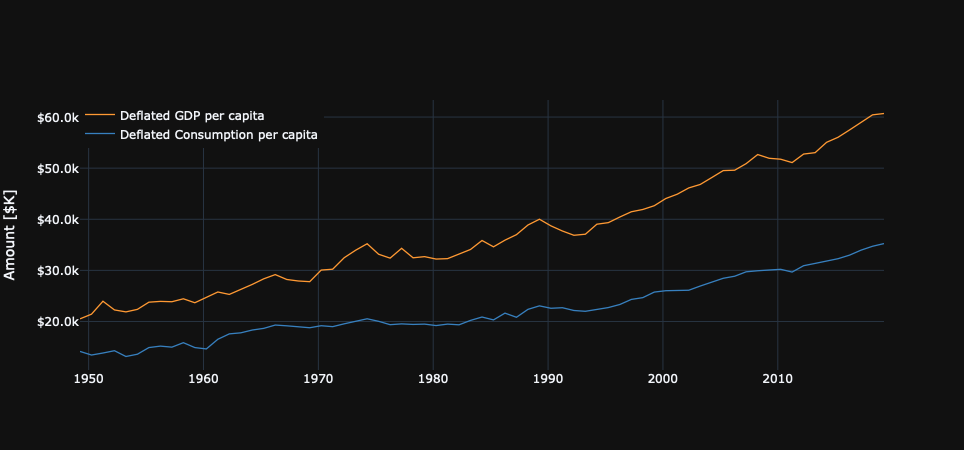

In [7]:
gdp = pd.read_csv('out/gen/gdp_1860-now.csv', parse_dates=True, index_col=0)
gdp[['Deflated GDP per capita', 'Deflated Consumption per capita']].dropna().iplot(
    layout=go.Layout(
        yaxis=go.layout.YAxis(title="Amount [$K]", tickformat="$.3s"),
        legend = go.layout.Legend(x=0)
    )
)
